In [3]:

%run ../../load_magic/storage.py
%pprint
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
Axes3D	 DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 colors	 
csv	 load_csv	 load_dataframes	 load_object	 mcolors	 os	 pd	 pickle	 plt	 
save_dataframes	 show_3d_plot	 store_objects	 sys	 


In [6]:

columns_list = ['Red', 'Green', 'Blue']
def colors_dict_to_df(colors_dict):
    rows_list = []
    index_list = []
    for base_name, color_tuple in colors_dict.items():
        row_dict = {}
        index_list.append(base_name)
        for i, color_value in enumerate(columns_list):
            row_dict[color_value] = color_tuple[i]
        rows_list.append(row_dict)
    df = pd.DataFrame(rows_list, columns=columns_list, index=index_list)
    
    return df

In [7]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.XKCD_COLORS.items()}
xkcd_colors_df = colors_dict_to_df(colors_dict)
X = xkcd_colors_df.values
pca_ndarray = PCA(n_components=2).fit_transform(X)

In [14]:

def show_3d_plot(three_d_df, z_column='Red', x_column='Green', y_column='Blue'):
    fig = plt.figure(figsize=(18, 8))
    ax = fig.add_subplot(111, projection='3d', autoscale_on=True)
    xlabel_text = ax.set_xlabel(x_column)
    ylabel_text = ax.set_ylabel(y_column)
    zlabel_text = ax.set_zlabel(z_column)
    columns_list = [x_column, y_column, z_column]
    df = three_d_df[columns_list].dropna(axis='index', how='any')
    pca_ndarray = df.values
    path_collection = ax.scatter(pca_ndarray[:, 0], pca_ndarray[:, 1],
                                 pca_ndarray[:, 2], alpha=0.75, c=df.index)
    title_text = 'Scatterplot of the {}, {}, and {} Data'
    text_obj = ax.set_title(title_text.format(x_column, y_column, z_column))

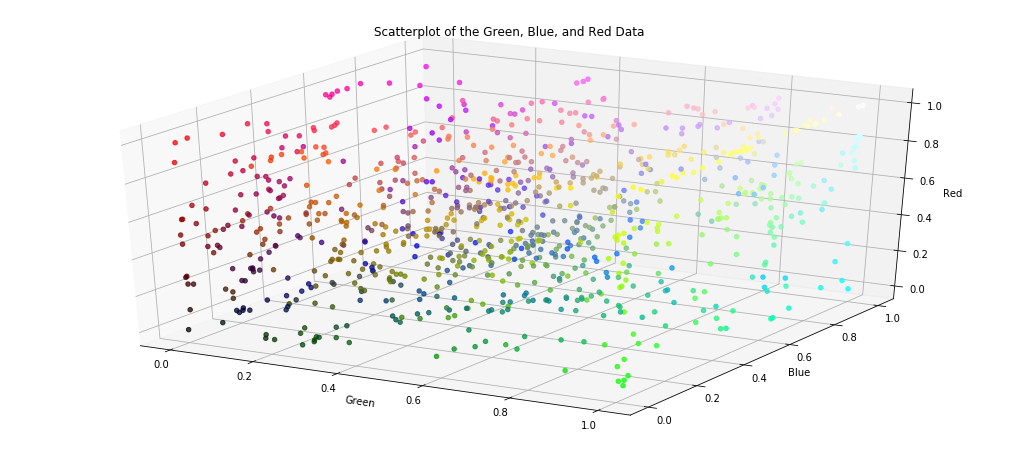

In [15]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

show_3d_plot(xkcd_colors_df)

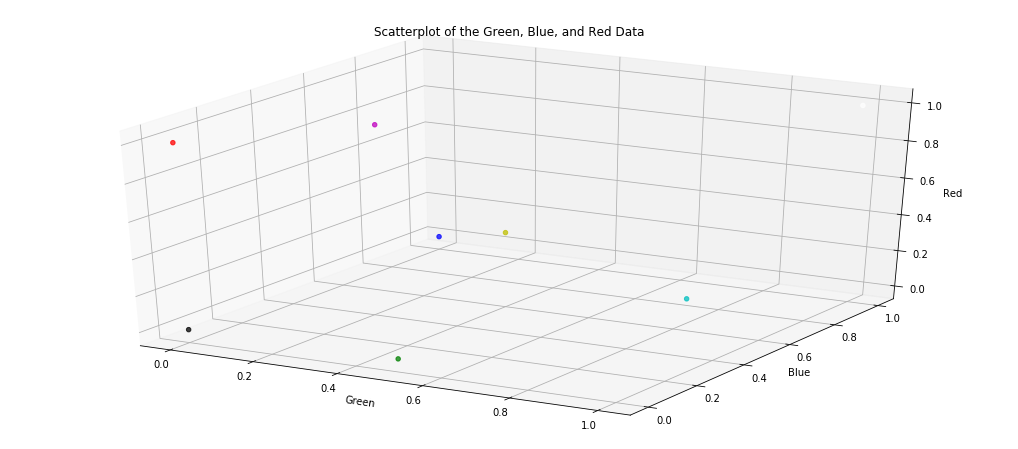

In [16]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.BASE_COLORS.items()}
base_colors_df = colors_dict_to_df(colors_dict)
show_3d_plot(base_colors_df)

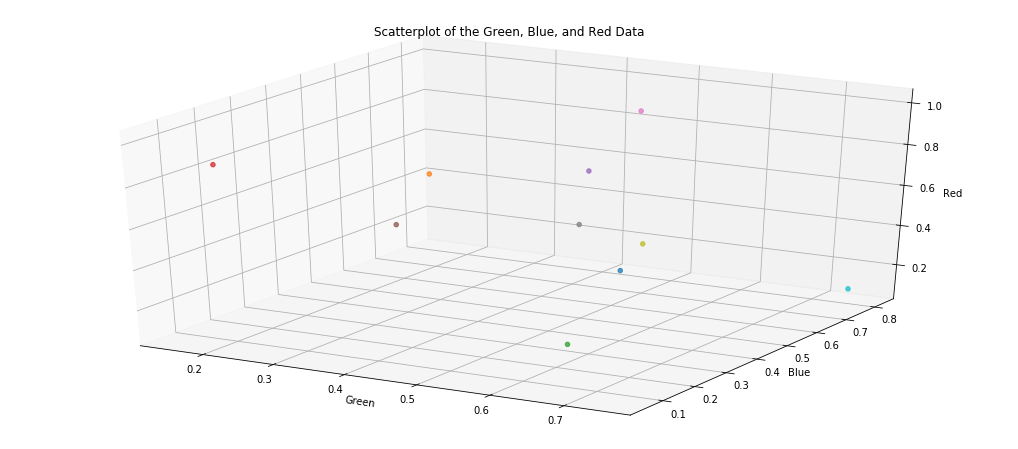

In [17]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.TABLEAU_COLORS.items()}
tab_colors_df = colors_dict_to_df(colors_dict)
show_3d_plot(tab_colors_df)

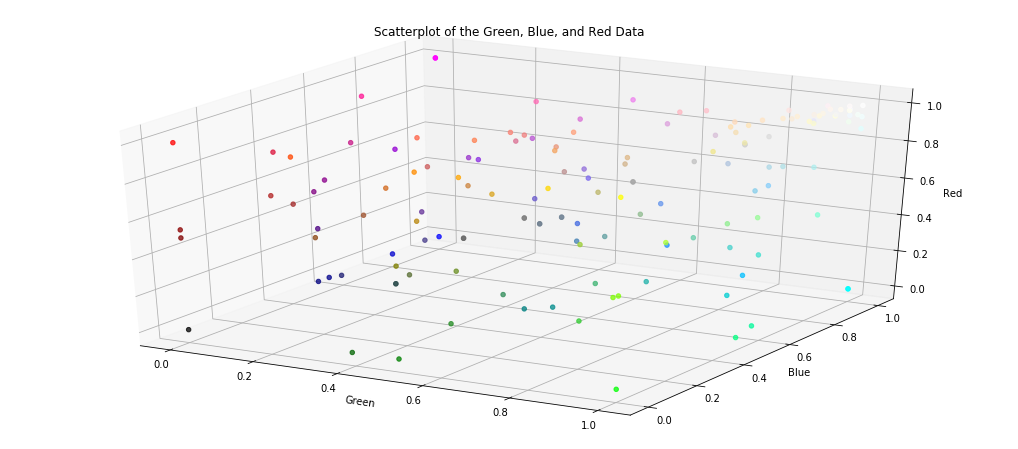

In [18]:

colors_dict = {name: mcolors.to_rgb(color) for name, color in mcolors.CSS4_COLORS.items()}
css4_colors_df = colors_dict_to_df(colors_dict)
show_3d_plot(css4_colors_df)

In [26]:

from math import cos, sin, pi, sqrt, atan

In [30]:

def distance_from_white(old_tuple):
    green_diff = 1.0 - old_tuple[0]
    blue_diff = 1.0 - old_tuple[1]
    red_diff = 1.0 - old_tuple[2]
    
    return sqrt(green_diff**2 + blue_diff**2 + red_diff**2)

In [31]:

def distance_from_black(old_tuple):
    
    return sqrt(old_tuple[0]**2 + old_tuple[1]**2 + old_tuple[2]**2)

In [32]:

def distance_from_red(old_tuple):
    red_diff = 1.0 - old_tuple[2]
    
    return sqrt(old_tuple[0]**2 + old_tuple[1]**2 + red_diff**2)

In [33]:

def distance_from_green(old_tuple):
    green_diff = 1.0 - old_tuple[0]
    
    return sqrt(green_diff**2 + old_tuple[1]**2 + old_tuple[2]**2)

In [34]:

def distance_from_blue(old_tuple):
    blue_diff = 1.0 - old_tuple[1]
    
    return sqrt(old_tuple[0]**2 + blue_diff**2 + old_tuple[2]**2)

In [35]:

def distance_from_magenta(old_tuple):
    blue_diff = 1.0 - old_tuple[1]
    red_diff = 1.0 - old_tuple[2]
    
    return sqrt(old_tuple[0]**2 + blue_diff**2 + red_diff**2)

In [36]:

def distance_from_yellow(old_tuple):
    green_diff = 1.0 - old_tuple[0]
    red_diff = 1.0 - old_tuple[2]
    
    return sqrt(green_diff**2 + old_tuple[1]**2 + red_diff**2)

In [37]:

def distance_from_cyan(old_tuple):
    green_diff = 1.0 - old_tuple[0]
    blue_diff = 1.0 - old_tuple[1]
    
    return sqrt(green_diff**2 + blue_diff**2 + old_tuple[2]**2)

In [38]:

rows_list = []
columns_list = ['distance_from_white', 'distance_from_black', 'distance_from_red', 'distance_from_green', 'distance_from_blue',
                'distance_from_magenta', 'distance_from_yellow', 'distance_from_cyan']
index_list = []
for row_index, row_series in base_colors_df.iterrows():
    green_value = row_series['Green']
    blue_value = row_series['Blue']
    red_value = row_series['Red']
    row_tuple = (green_value, blue_value, red_value)
    row_dict = {}
    row_dict['distance_from_white'] = distance_from_white(row_tuple)
    row_dict['distance_from_black'] = distance_from_black(row_tuple)
    row_dict['distance_from_red'] = distance_from_red(row_tuple)
    row_dict['distance_from_green'] = distance_from_green(row_tuple)
    row_dict['distance_from_blue'] = distance_from_blue(row_tuple)
    row_dict['distance_from_magenta'] = distance_from_magenta(row_tuple)
    row_dict['distance_from_yellow'] = distance_from_yellow(row_tuple)
    row_dict['distance_from_cyan'] = distance_from_cyan(row_tuple)
    rows_list.append(row_dict)
    index_list.append(row_index)
base_distance_df = pd.DataFrame(rows_list, columns=columns_list, index=index_list)
base_distance_df

,distance_from_white,distance_from_black,distance_from_red,distance_from_green,distance_from_blue,distance_from_magenta,distance_from_yellow,distance_from_cyan
b,1.414214,1.000000,1.414214,1.414214,0.000000,1.000000,1.732051,1.000000
g,1.500000,0.500000,1.118034,0.500000,1.118034,1.500000,1.118034,1.118034
r,1.414214,1.000000,0.000000,1.414214,1.414214,1.000000,1.000000,1.732051
c,1.060660,1.060660,1.457738,0.790569,0.790569,1.274755,1.274755,0.353553
m,1.060660,1.060660,0.790569,1.457738,0.790569,0.353553,1.274755,1.274755
y,1.060660,1.060660,0.790569,0.790569,1.457738,1.274755,0.353553,1.274755
k,1.732051,0.000000,1.000000,1.000000,1.000000,1.414214,1.414214,1.414214
w,0.000000,1.732051,1.414214,1.414214,1.414214,1.000000,1.000000,1.000000


In [62]:

from itertools import combinations

full_corner_list = ['white', 'black', 'red', 'green', 'blue', 'magenta', 'yellow', 'cyan']
bryg_combs_obj = combinations(['black', 'red', 'green', 'yellow'], 3)
bryg_face_set_list = []
for color_tuple in bryg_combs_obj:
    bryg_face_set_list.append(set(color_tuple))
bryg_face_set_list

[{'black', 'green', 'red'}, {'black', 'red', 'yellow'}, {'black', 'green', 'yellow'}, {'yellow', 'green', 'red'}]

In [63]:

for row_index, row_series in base_distance_df.iterrows():
    tuple_list = sorted(row_series.to_dict().items(), key=lambda x: x[1])
    if tuple_list[0][1] == 0.0:
        print('{} is in the {} corner'.format(row_index, tuple_list[0][0].split('_')[2]))
    else:
        corners_list = tuple_list[:3]
        face_set = set([corners_list[0][0].split('_')[2], corners_list[1][0].split('_')[2], corners_list[2][0].split('_')[2]])
        if face_set in bryg_face_set_list:
            print('{} is nearest the black-red-yellow-green face'.format(row_index))
        else:
            print('{} is nearest the {} face'.format(row_index, '-'.join(list(face_set))))

b is in the blue corner
g is nearest the black-red-yellow-green face
r is in the red corner
c is nearest the cyan-blue-green face
m is nearest the blue-magenta-red face
y is nearest the black-red-yellow-green face
k is in the black corner
w is in the white corner


In [29]:

base_colors_df

,Red,Green,Blue
b,0.00,0.00,1.00
g,0.00,0.50,0.00
r,1.00,0.00,0.00
c,0.00,0.75,0.75
m,0.75,0.00,0.75
y,0.75,0.75,0.00
k,0.00,0.00,0.00
w,1.00,1.00,1.00


In [14]:

def plot_colortable(colors_dict, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors_dict by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors_dict.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors_dict)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors_dict[name], linewidth=18)

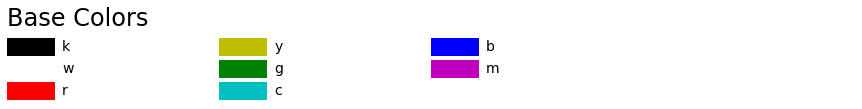

In [19]:

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=True, emptycols=1)

In [15]:

colors_dict = mcolors.BASE_COLORS
colors_dict

{'b': (0, 0, 1), 'g': (0, 0.5, 0), 'r': (1, 0, 0), 'c': (0, 0.75, 0.75), 'm': (0.75, 0, 0.75), 'y': (0.75, 0.75, 0), 'k': (0, 0, 0), 'w': (1, 1, 1)}

In [17]:

# Red, Green, Blue
{name: mcolors.to_rgb(color) for name, color in colors_dict.items()}

{'b': (0.0, 0.0, 1.0), 'g': (0.0, 0.5, 0.0), 'r': (1.0, 0.0, 0.0), 'c': (0.0, 0.75, 0.75), 'm': (0.75, 0.0, 0.75), 'y': (0.75, 0.75, 0.0), 'k': (0.0, 0.0, 0.0), 'w': (1.0, 1.0, 1.0)}

In [18]:

# Hue, Saturation, Value
{name: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))) for name, color in colors_dict.items()}

{'b': (0.6666666666666666, 1.0, 1.0), 'g': (0.3333333333333333, 1.0, 0.5), 'r': (0.0, 1.0, 1.0), 'c': (0.5, 1.0, 0.75), 'm': (0.8333333333333334, 1.0, 0.75), 'y': (0.16666666666666666, 1.0, 0.75), 'k': (0.0, 0.0, 0.0), 'w': (0.0, 0.0, 1.0)}

In [26]:

base_colors_df

,Red,Green,Blue
b,0.00,0.00,1.00
g,0.00,0.50,0.00
r,1.00,0.00,0.00
c,0.00,0.75,0.75
m,0.75,0.00,0.75
y,0.75,0.75,0.00
k,0.00,0.00,0.00
w,1.00,1.00,1.00


In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], 'k+')
ax.plot(X2D[:, 0], X2D[:, 1], 'k.')
ax.plot([0], [0], 'ko')
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel('$z_1$', fontsize=18)
ax.set_ylabel('$z_2$', fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig('dataset_2d_plot')

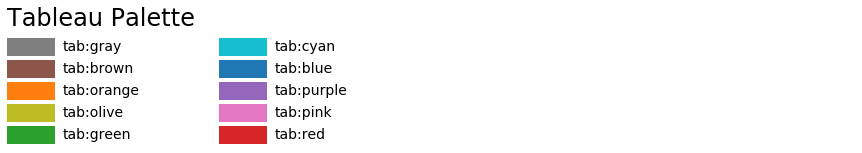

In [20]:

plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=True, emptycols=2)

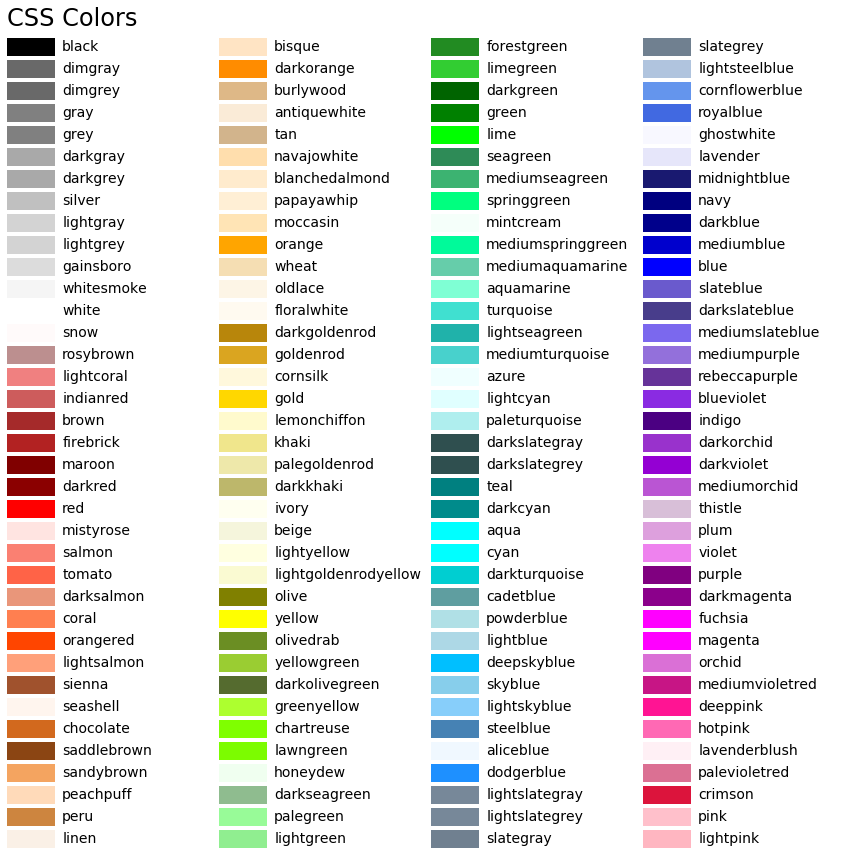

In [11]:

#sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

In [35]:

for name, color in mcolors.XKCD_COLORS.items():
    print(name, color)
    print(mcolors.to_rgb(color))
    break

xkcd:cloudy blue #acc2d9
(0.6745098039215687, 0.7607843137254902, 0.8509803921568627)


In [60]:

eps = 0.09
min_samples = 1
db = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_ndarray)
labels_ndarray = db.labels_
unique_labels = np.unique(labels_ndarray)
unique_labels_count = len(unique_labels)
if (unique_labels_count > 4) and (unique_labels_count < 8):
    print('np.unique(DBSCAN(eps={}, min_samples={}).fit(pca_ndarray).labels_) = {}'.format(eps, min_samples, unique_labels))

np.unique(DBSCAN(eps=0.09, min_samples=1).fit(pca_ndarray).labels_) = [0 1 2 3 4]


In [ ]:

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for col, label, x, y in zip(labels_ndarray, merge_df.index,
                            pca_ndarray[:, 0], pca_ndarray[:, 1]):
    if (label == 'Franks'):
        annotation = plt.annotate('{} (and everyone else)'.format(label), xy=(x, y),
                                  xytext=(20, 10), **kwargs)
    elif (col == 1):
        annotation = plt.annotate(label, xy=(x, y), xytext=(10, -20), **kwargs)
    elif (col == 2):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)
    elif (col == 3):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 20), **kwargs)
    elif (col == 4):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-10, 20), **kwargs)

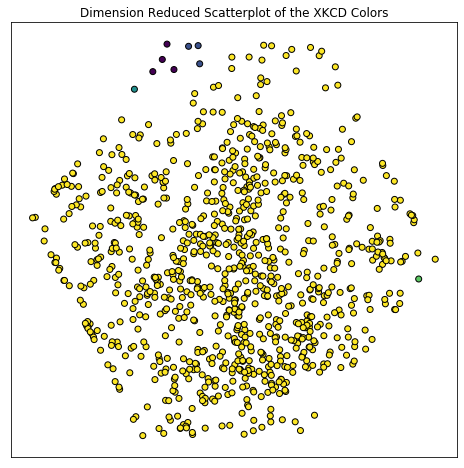

In [61]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, autoscale_on=True)
cmap = plt.get_cmap('viridis_r')
path_collection = ax.scatter(pca_ndarray[:, 0], pca_ndarray[:, 1],
                             c=labels_ndarray, edgecolors=(0, 0, 0), cmap=cmap)
title_text = 'Dimension Reduced Scatterplot of the XKCD Colors'
text = plt.title(title_text)
xticklabel_obj = plt.xticks([])
yticklabel_obj = plt.yticks([])

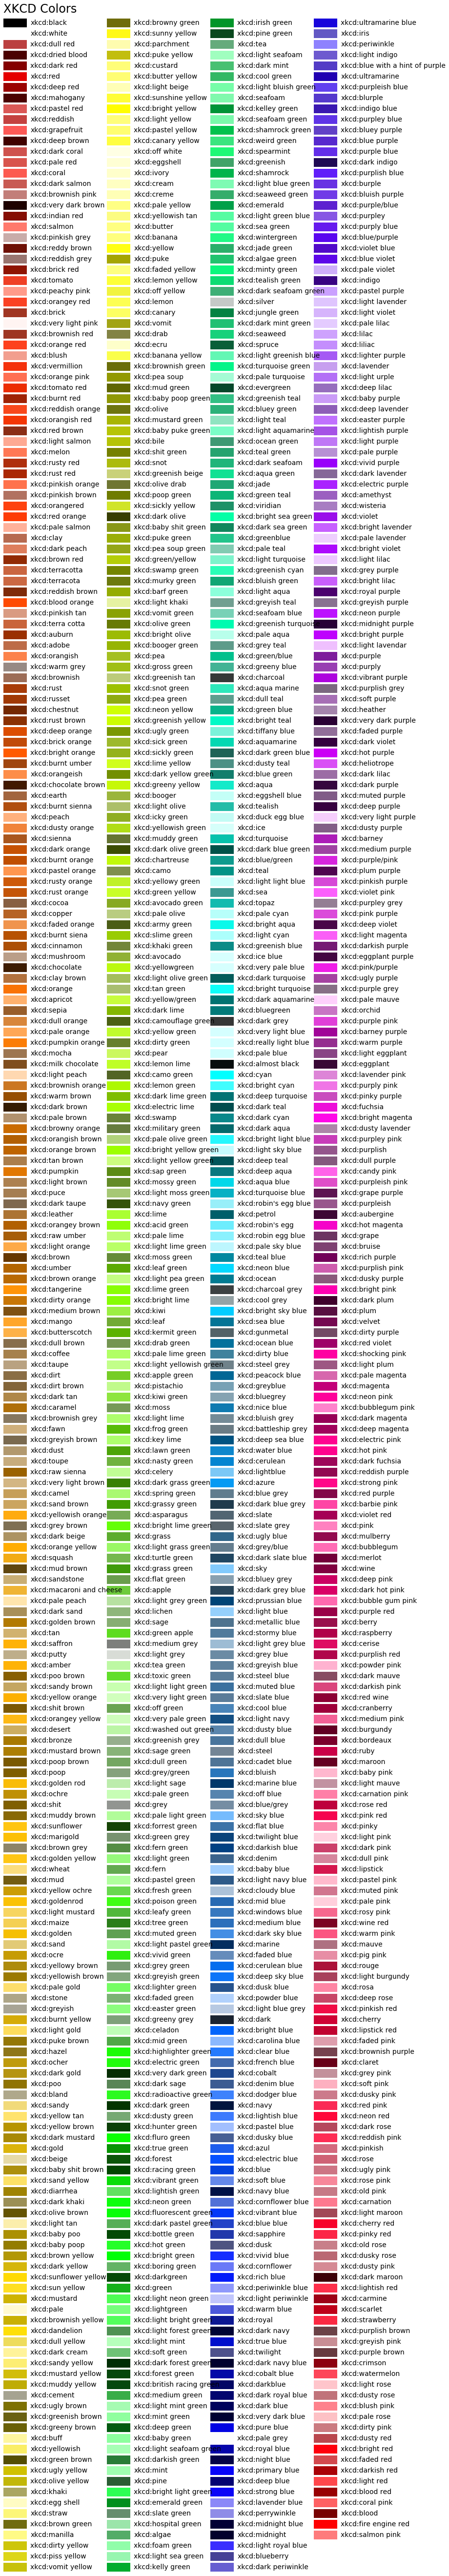

In [7]:

# Optionally plot the XKCD colors (Caution: will produce large figure)
file_name = 'XKCD_Colors.png'
png_folder = os.path.join(SAVES_FOLDER, 'png')
file_path = os.path.join(png_folder, file_name)
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
xkcd_fig.savefig(file_path)

In [12]:

patriline_df = load_object('patriline_df')
min_year = patriline_df['Year of Birth'].min()
generations_df = load_object('generations_df')
match_series = (generations_df['birth_year_begin'] >= min_year)
generations_df[match_series]['saeculum_name'].unique()

array(['Reformation', 'New World', 'Revolutionary', 'Civil War',
       'Great Power', 'Millennial'], dtype=object)

In [13]:

unique_color_groups_count = len(generations_df[match_series]['saeculum_name'].unique())
print(type(mcolors.XKCD_COLORS))
dir(mcolors.XKCD_COLORS)

<class 'dict'>


['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']